In [433]:
#import required libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [785]:
#read the dataset using pandas and display first five rows
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [786]:
#check
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [872]:
# This helps us in profiling the dataset
# Profiling helps you understand data better!
!pip install pandas-profiling
import pandas_profiling 

profile = pandas_profiling.ProfileReport(df)
profile.to_file("profile_report.html") #exporting to html file for a better view 

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [787]:
#calculate median of the missing value column
median = df['Albumin_and_Globulin_Ratio'].median()
median

1.0

In [788]:
#fill the missing values with the 'median' value
df['Albumin_and_Globulin_Ratio'].fillna(median, inplace=True)

In [789]:
#check - there are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  500 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [791]:
#check for duplicates
df.duplicated().sum()

13

In [792]:
#display duplicate rows
df[df.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [793]:
#drop duplicate records (13)
df.drop_duplicates(inplace=True)
df.shape

(487, 11)

In [794]:
#converting gender (catogorical variable) to male and female variables (numerical) 
df = pd.get_dummies(df) #One hot encoding!
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [795]:
#check count of diseased. 1 - positive, 2 - negative
df['Liver_Problem'].value_counts()

1    340
2    147
Name: Liver_Problem, dtype: int64

In [796]:
#find the correlation values among varibles
corr = df.corr()
corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
Age,1.000000,0.058554,0.067924,0.088698,-0.091765,-0.023919,-0.230550,-0.281114,-0.202052,-0.151892,-0.045650,0.045650
Total_Bilirubin,0.058554,1.000000,0.780324,0.268434,0.277693,0.249550,-0.056239,-0.188971,-0.244269,-0.187622,-0.057725,0.057725
Direct_Bilirubin,0.067924,0.780324,1.000000,0.346356,0.341593,0.306391,-0.052096,-0.205394,-0.274376,-0.229109,-0.062632,0.062632
Alkaline_Phosphotase,0.088698,0.268434,0.346356,1.000000,0.125116,0.168554,-0.036249,-0.181910,-0.285343,-0.195638,0.011705,-0.011705
Alamine_Aminotransferase,-0.091765,0.277693,0.341593,0.125116,1.000000,0.793390,-0.031111,-0.023309,0.002036,-0.161598,-0.094474,0.094474
Aspartate_Aminotransferase,-0.023919,0.249550,0.306391,0.168554,0.793390,1.000000,-0.025887,-0.070995,-0.065521,-0.142229,-0.086584,0.086584
Total_Protiens,-0.230550,-0.056239,-0.052096,-0.036249,-0.031111,-0.025887,1.000000,0.833740,0.296846,0.031983,0.090392,-0.090392
Albumin,-0.281114,-0.188971,-0.205394,-0.181910,-0.023309,-0.070995,0.833740,1.000000,0.735639,0.145667,0.065590,-0.065590
Albumin_and_Globulin_Ratio,-0.202052,-0.244269,-0.274376,-0.285343,0.002036,-0.065521,0.296846,0.735639,1.000000,0.189817,-0.008973,0.008973
Liver_Problem,-0.151892,-0.187622,-0.229109,-0.195638,-0.161598,-0.142229,0.031983,0.145667,0.189817,1.000000,0.040520,-0.040520


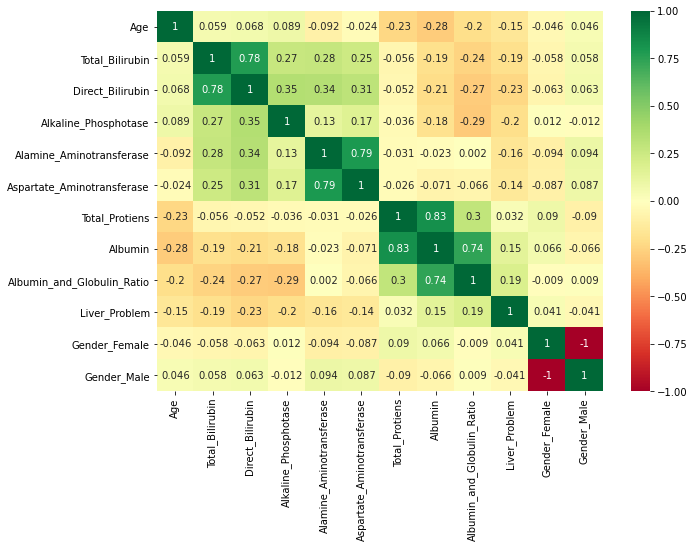

In [797]:
#draw a heatmap based on correlation values
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(corr, annot = True, cmap="RdYlGn")

# Building model considering all the columns and let's check the accuracy

In [846]:
#considering all variables except "Dataset" as input variables 
X=df.drop(columns= ['Liver_Problem'])
y=df['Liver_Problem'] #target variable

In [847]:
#split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [853]:
#check
X_test.shape

(98, 11)

In [849]:
#train the model - Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [850]:
#test the model on test data
y_pred = lr.predict(X_test)

In [851]:
#test the acccuracy of the model
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7551020408163265

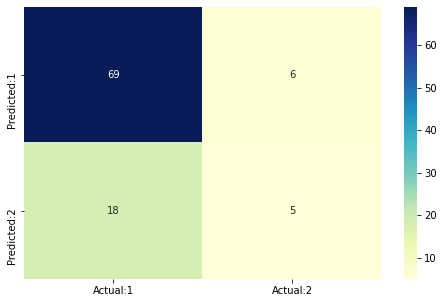

In [854]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Actual:1','Actual:2'],index=['Predicted:1','Predicted:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Accuracy of the model is 75.51% which is OKAY!!  But now, let's do some feature engineering and build the model, then check the accuracy

# Approach 2

## Let's do some feature engineering based on correlation values in heatmap!

In [875]:
#considering input variables based on correlation values with the target variable 
X_train=df[[ 'Albumin_and_Globulin_Ratio','Direct_Bilirubin', 'Age','Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Gender_Female','Gender_Male']]
#X_train = df.drop(columns = ['Liver_Problem'])
y_train=df['Liver_Problem']
X_train.shape
df.shape

(487, 12)

In [866]:
# read test dataset (unseen data) 
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [867]:
# convert categorical(gender) to numerical data 
test_new = pd.get_dummies(test_new)

In [868]:
# select varibales for testing
X_test = test_new[[ 'Albumin_and_Globulin_Ratio','Direct_Bilirubin', 'Age','Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Gender_Female','Gender_Male']]

In [869]:
#train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [878]:
#test the model on test data
predictions = lr.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [880]:
#writing prediction values to csv!
res = pd.DataFrame(predictions)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP.csv")  

## We can observe there is an improvement in the accuracy of the model after feature engineering!! ~84.14%

## Tadaa!!! Stay safe and have fun!! Happy learning!! :)